___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Grids

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## catplot()

categorical plot

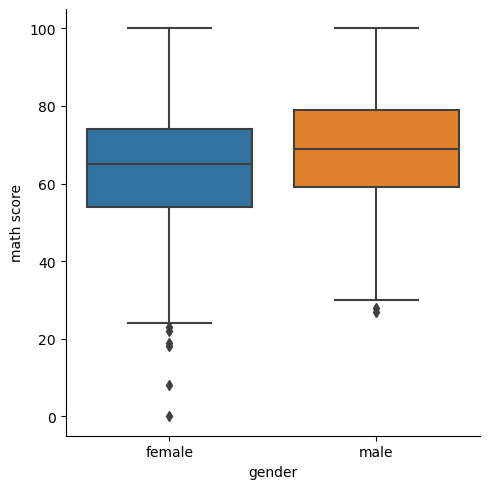

In [8]:
# Kind Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
sns.catplot(x='gender',y='math score',data=df,kind='box')

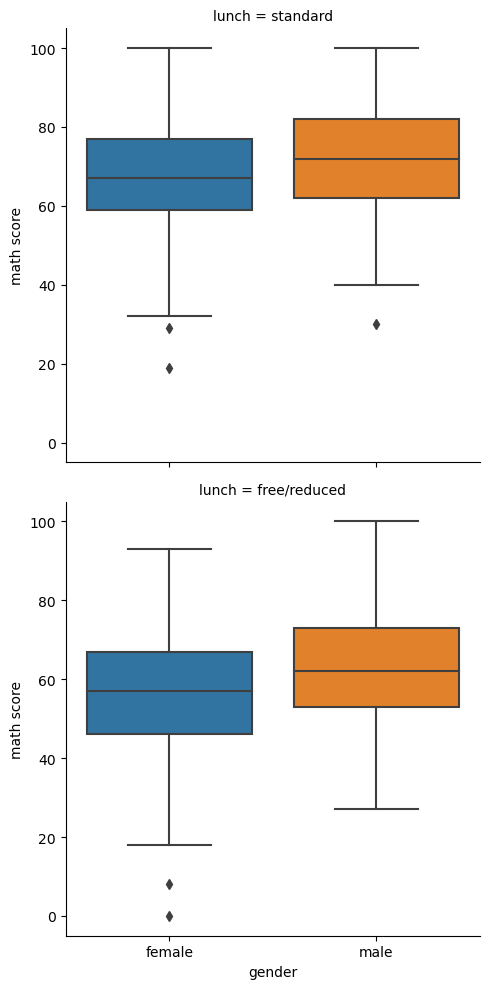

In [5]:
sns.catplot(x='gender',y='math score',data=df,kind='box',row='lunch')

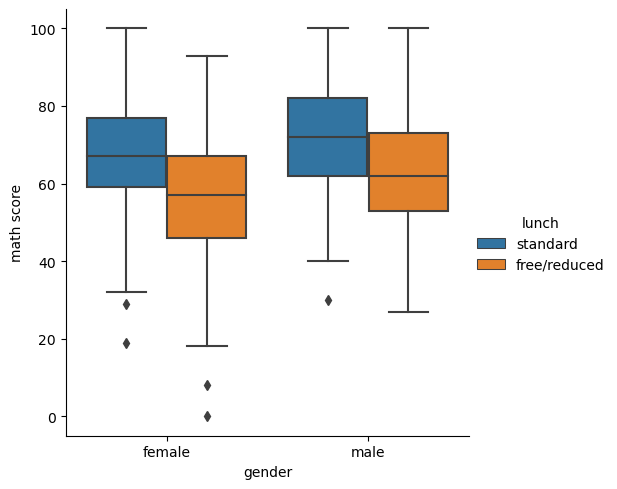

In [7]:
# instead of row, if we use "hue"
sns.catplot(x='gender',y='math score',data=df,kind='box',hue='lunch')
# this look much better in my opinion, it seprates the hue i.e "lunch" with color and two different plots for "gender"

# with "row", it was seprating "gender" with diff colors and two different plots to seperate "lunch"

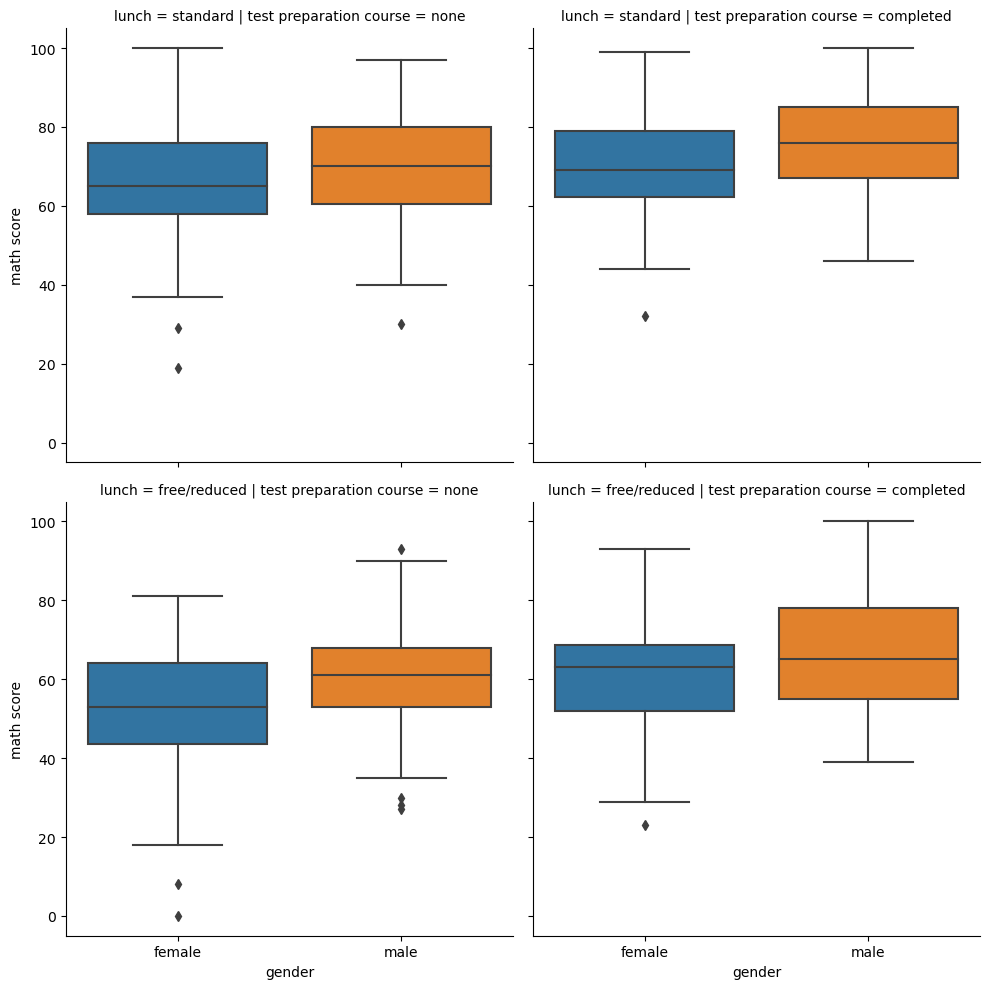

In [6]:
sns.catplot(x='gender',y='math score',data=df,kind='box',row='lunch',col='test preparation course')

## Warning:
do not use a lot of rows and cols with catplot, max use 2x2, for anything bigger than that the user need to scroll a lot to analyse the data, that is not user-friendly

## Pairgrid

Grid that pairplot is built on top of, allows for heavy customization of the pairplot seen earlier.

<Figure size 500x300 with 0 Axes>

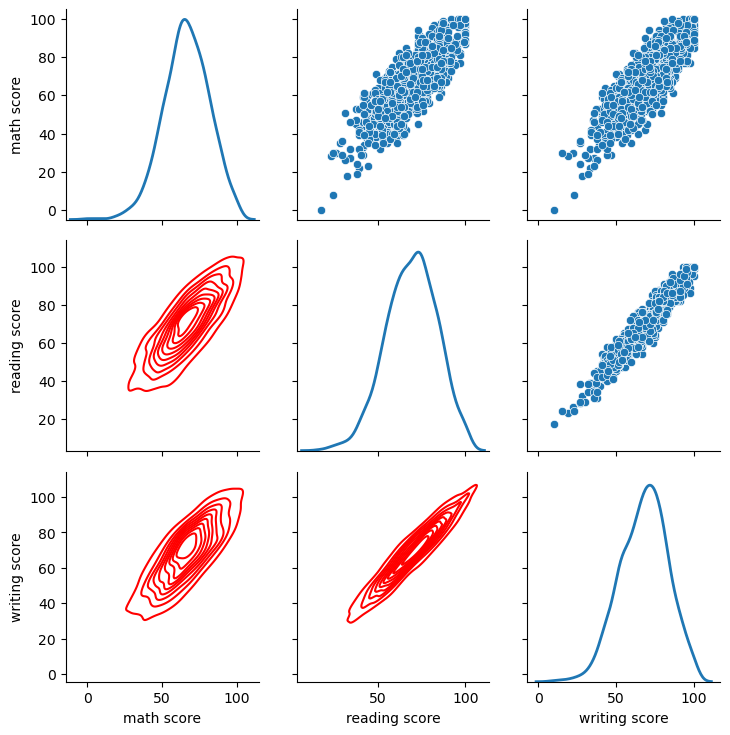

In [14]:
plt.figure(figsize=(5,3))
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot) # upper triangle
g = g.map_diag(sns.kdeplot, lw=2) # diagonal
g = g.map_lower(sns.kdeplot, colors="red") # lower triangle

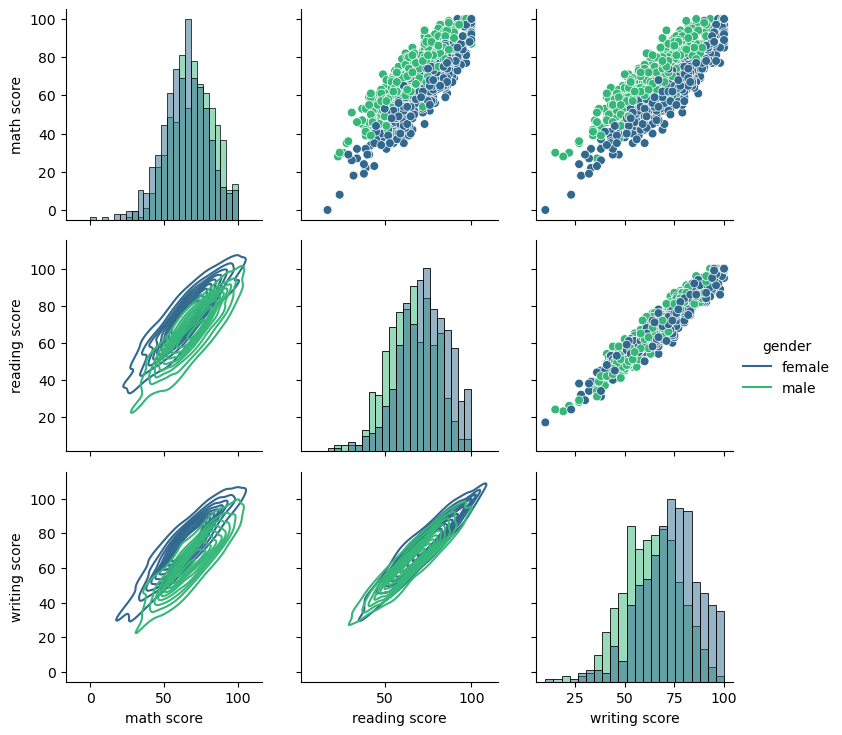

In [12]:
# `distplot` is a deprecated function and will be removed in seaborn v0.14.0.
# Please adapt your code to use either `displot` (a figure-level function with
# similar flexibility) or `histplot` (an axes-level function for histograms).

g = sns.PairGrid(df, hue="gender", palette="viridis",hue_kws={"marker": ["o", "+"]})
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
# g = g.map_diag(sns.distplot)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend(); # legend manually added

# Safely ignore the warning, its telling you it didn't use the marker for kde plot

## FacetGrid
catplot() etc uses FacetGrid() under the hood but to use it exclusively, it is a lot more work

no read to study this at all ---- time waste

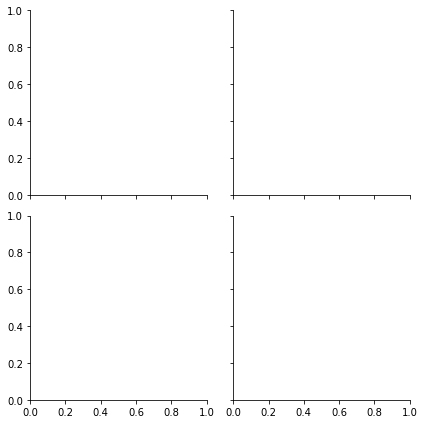

In [4]:
sns.FacetGrid(data=df,col='gender',row='lunch')

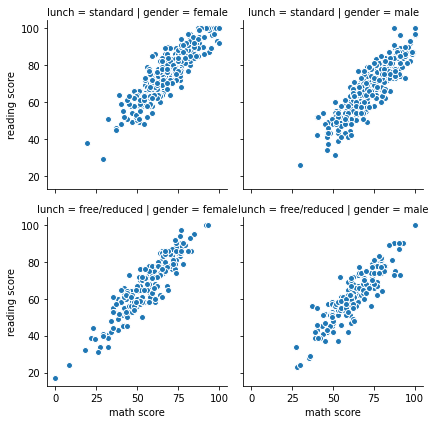

In [25]:
g = sns.FacetGrid(data=df,col='gender',row='lunch')
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w")
g.add_legend()

In [26]:
# https://stackoverflow.com/questions/43669229/increase-space-between-rows-on-facetgrid-plot

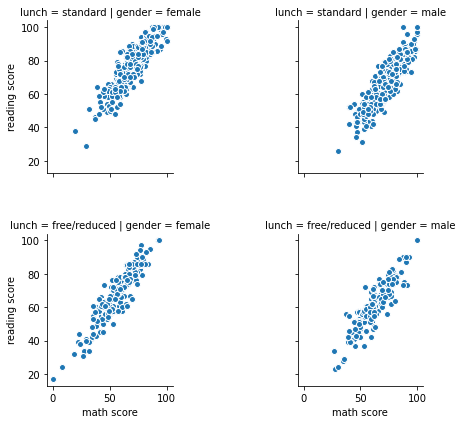

In [29]:
g = sns.FacetGrid(data=df,col='gender',row='lunch')
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w")
g.add_legend()

plt.subplots_adjust(hspace=0.4, wspace=1)

----
----
## completed on 26th april 23